# Introduction to Machine Learning with `scikit-learn`

# Agenda
* * *
* Go through a crash course in ML and get a high-level understanding of `scikit-learn` module
* See how to visualize and explore a built-in dataset
* Data preprocessing

## `sklearn`'s way of algorithms
---

![sklearn's ML map](images/ml_map.png)


### Three classical categories of ML Algorithms
1.  Supervised learning - we get the data and the labels
2.  Unsupervised learning - only get the data (no labels)
3.  Reinforcement learning - reward/penalty based information (feedback)

### Another way of categorizing ML approaches
1.  Classification
2.  Regression
3.  Clustering
4.  Density estimation
5.  Dimensionality reduction

---

### The problem solved in supervised learning

- classification
- regression

**Methods**
- `fit(X, y)`
- `predict(X)`

---

### The problem solved in <i>un</i>supervised learning

- Clustering
- Dimensionality reduction

**Methods**
- `fit()`
- `transform()`
- `fit_transform()`

---


# Loading required libraries

In [1]:
# Familiar imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## (Collect Data), Visualize and Explore
---

### Question
> What type of flower is this (pictured below) closest to of the three given classes?
> 1. Satosa
> 2. Versicolor
> 3. Virginica

<img border="0" alt="iris species" src="images/iris-setosa.jpg" width="200">
<p align="right">from http://www.madlantern.com/photography/wild-iris</p>

### Labels (species names/classes):
<img border="0" alt="iris species" src="images/irises.png" width="500" height="500">


### The Dataset - Fisher's Irises

- **Data:** two-dimensional array or matrix = n_samples X n_features
- **Target:** one-dimensional arrays or lists = n_targets

In [2]:
from sklearn import datasets

# Load data
iris = datasets.load_iris()

### Looking into the iris data set
---

#### Features

In [3]:
# Check type of data matrix.  fill in the blank
print(iris.data[1:4])
print("\n\nFeature(column) names are: ", iris.feature_names)

[[ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]]


Feature(column) names are:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### target classes

In [4]:
print(iris.target)
print("\n\nFeature(column) names are: ", iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Feature(column) names are:  ['setosa' 'versicolor' 'virginica']


### Get to know the data - explore
* Features (columns/measurements) are depicted in this diagram:
<img border="0" alt="iris data features" src="images/iris_petal_sepal.png" width="200" height="200">

Next, let's explore:
* Shape
* The actual data
* Summaries

<b>Shape and representation<b>

In [5]:
# How many data points (rows) x how many features (columns)
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


<b>Sneak a peek at data (and a reminder of your `pandas` dataframe methods)<b>

In [6]:
# Convert to pandas df (adding real column names) to use some pandas functions (head, describe...)
iris.df = pd.DataFrame(iris.data, columns = iris.feature_names)

# First few rows
iris.df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Summary Statistics

In [7]:
# Summary stats
iris.df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* We don't have to do much with the `iris` dataset.
* It has no missing values.
* However we could try <b>standardization</b> and/or <b>normalization</b>.

## Visualize
* We will visualize the sepal length for various classes of iris

In [8]:
iris.df['target'] = iris.target
iris.df.head()
#iris.df.replace([0, 1, 2], ["setosa", "versicolor", "virginica"]).sample(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# A bit of rearrangement for plotting
df = iris.df.loc[:, ['sepal length (cm)', 'target']]

# Add an index column which indicates index within a class
df['idx'] = list(range(0, 50)) * 3

# Rearrange to be rows of class values rather feature values for a sample
df = df.pivot(index = 'idx', columns = 'target')
df.head()


sepal length (cm)          
target                 0    1    2
idx                               
0                    5.1  7.0  6.3
1                    4.9  6.4  5.8
2                    4.7  6.9  7.1
3                    4.6  5.5  6.3
4                    5.0  6.5  6.5

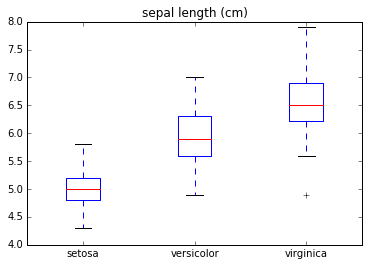

In [19]:
# Convert back to an array
df = np.array(df)

# Plot a boxplot!
plt.boxplot(df, labels = iris.target_names)
plt.title('sepal length (cm)')

# Creating our first model
---
* This model is an illustration of the patterns you will encounter in `sklearn`
* Just for fun, we'll perform naive bayes classification on the `iris` dataset


**Step1**: Loading data and spliting it into training and testing

In [20]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split

# Other datasets in sklearn have similar "load" functions
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Step2**: Initialize and train the model

In [24]:
from sklearn.naive_bayes import GaussianNB

# Our model - a naive bayes classifier
# FIRST we initialize it with default params or specify some
naiveBayes = GaussianNB()

# Train on iris training set
naiveBayes.fit(X_train, y_train)

array([ 0.32380952,  0.34285714,  0.33333333])

**Step3**: Testing the model

In [25]:
# Place data in array of arrays (1D array -> 2D array w/ 1 row)
X_sample_test = X_test[3]

# THIRD we give our model some test data and predict something
y_predict = naiveBayes.predict(X_sample_test)

print('Predicted class %s, real class %s' % (
        y_predict, y_test[3]))

Predicted class [1], real class 1


/Users/kalpeshadhatrao/Envs/data-science/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


**Step4**: View probablity of each class

In [26]:
print('Probabilities of membership in each class: %s' % 
      naiveBayes.predict_proba(X_sample_test))

Probabilities of membership in each class: [[  1.82346702e-47   9.99999795e-01   2.04824376e-07]]


/Users/kalpeshadhatrao/Envs/data-science/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


**Step5**: Checking the accuracy of the model

In [27]:
naiveBayes.score(X_test, y_test)

0.9555555555555556